# AIS Data Analysis

This code attempts to analyse a dataset of AIS data and detect potential anomalies within it using both statistical and graphical methods.

In [1]:
# This code imports some libraries that will be used in this analysis

import sys
import numpy as np
import time
import pandas as pd

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

Read in AIS message data from CSV file containing all_messages

In [2]:
AIS_data = pd.read_csv("all_messages.csv") #assumes that csv file is present in the same directory

The following functions have been used to get a quick understanding of the data. In particular, the info() function shows how many non-null entries there are in each column and the data type.

In [3]:
#AIS_data.head()

In [4]:
#AIS_data.describe()

In [5]:
AIS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 74 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   msg_type      1435 non-null   int64  
 1   repeat        1435 non-null   int64  
 2   mmsi          1435 non-null   object 
 3   year          139 non-null    float64
 4   month         198 non-null    float64
 5   day           198 non-null    float64
 6   hour          198 non-null    float64
 7   minute        198 non-null    float64
 8   second        1268 non-null   float64
 9   accuracy      1268 non-null   float64
 10  lon           1268 non-null   float64
 11  lat           1268 non-null   float64
 12  epfd          258 non-null    float64
 13  spare         1246 non-null   object 
 14  raim          1268 non-null   object 
 15  radio         1208 non-null   float64
 16  time          1435 non-null   int64  
 17  ais_version   59 non-null     float64
 18  imo           59 non-null   

In this section of the code, new dataframes will be created where only 1 feature is used along with message type and MMSI (all rows will be kept at this stage). In this way, the messages containing the data to be investigated will be clearly isolated from all the other data.

The features that will be investigated are: speed, time,speed,lat & lon

In [6]:
#Isolate AIS messages containing speed
speed_columns = [0,2,31] #values corresponding to the columns containing msg_type, mmsi and speed
speed_data = AIS_data.iloc[:, speed_columns]

In [7]:
speed_data #print to check

,msg_type,mmsi,speed
0,4,002766160-A-4,NaN
1,5,636020457-B-5,NaN
2,1,276538000-B-1-UnderWayUsingEngine,0.0
3,18,276007420-A-18,23.6
4,1,276643000-A-1-EngagedInFishing,0.9
...,...,...,...
1430,1,276330000-A-1-UnderWayUsingEngine,0.0
1431,1,276003580-A-1-UnderWayUsingEngine,0.0
1432,1,276829000-A-1-UnderWayUsingEngine,22.1
1433,21,992761005-A-21,NaN


In [8]:
#Isolate AIS messages containing time
time_columns = [0,2,16] #msg_type, mmsi and time
time_data = AIS_data.iloc[:, time_columns]

In [9]:
#time_data #print to check

In [10]:
#Isolate AIS messages containing latitude and longitude
lon_lat_columns = [0,2,10,11] #msg_type, mmsi and time
lon_lat_data = AIS_data.iloc[:, lon_lat_columns]

In [11]:
lon_lat_data #print to check

,msg_type,mmsi,lon,lat
0,4,002766160-A-4,25.500053,59.645888
1,5,636020457-B-5,NaN,NaN
2,1,276538000-B-1-UnderWayUsingEngine,24.713998,59.462525
3,18,276007420-A-18,24.759658,59.555717
4,1,276643000-A-1-EngagedInFishing,24.347427,59.573597
...,...,...,...,...
1430,1,276330000-A-1-UnderWayUsingEngine,24.792167,59.558783
1431,1,276003580-A-1-UnderWayUsingEngine,24.669495,59.451380
1432,1,276829000-A-1-UnderWayUsingEngine,24.753918,59.694997
1433,21,992761005-A-21,25.072603,59.628142


The next step is to remove any data entries from each individual dataframe that contain invalid/missing data e.g NaN values. The rows will be completely removed and the remaining data will be stored in another dataframe. 

In [12]:
#Remove all values that are missing/invalid eg. NaN values
#speed_data
final_speed_data = speed_data.dropna()

In [13]:
final_speed_data #print to check

,msg_type,mmsi,speed
2,1,276538000-B-1-UnderWayUsingEngine,0.0
3,18,276007420-A-18,23.6
4,1,276643000-A-1-EngagedInFishing,0.9
5,1,276841000-B-1-UnderWayUsingEngine,0.0
6,1,276003580-A-1-UnderWayUsingEngine,0.0
...,...,...,...
1428,1,276538000-B-1-UnderWayUsingEngine,0.0
1430,1,276330000-A-1-UnderWayUsingEngine,0.0
1431,1,276003580-A-1-UnderWayUsingEngine,0.0
1432,1,276829000-A-1-UnderWayUsingEngine,22.1


In [14]:
#latitude and longitude data
final_lon_lat_data = lon_lat_data.dropna()

In [15]:
final_lon_lat_data #print to check

,msg_type,mmsi,lon,lat
0,4,002766160-A-4,25.500053,59.645888
2,1,276538000-B-1-UnderWayUsingEngine,24.713998,59.462525
3,18,276007420-A-18,24.759658,59.555717
4,1,276643000-A-1-EngagedInFishing,24.347427,59.573597
5,1,276841000-B-1-UnderWayUsingEngine,24.814323,59.499160
...,...,...,...,...
1430,1,276330000-A-1-UnderWayUsingEngine,24.792167,59.558783
1431,1,276003580-A-1-UnderWayUsingEngine,24.669495,59.451380
1432,1,276829000-A-1-UnderWayUsingEngine,24.753918,59.694997
1433,21,992761005-A-21,25.072603,59.628142


In [16]:
#time data
final_time_data = time_data.dropna()

In [17]:
final_time_data #print to check

,msg_type,mmsi,time
0,4,002766160-A-4,1662517800
1,5,636020457-B-5,1662517801
2,1,276538000-B-1-UnderWayUsingEngine,1662517801
3,18,276007420-A-18,1662517801
4,1,276643000-A-1-EngagedInFishing,1662517802
...,...,...,...
1430,1,276330000-A-1-UnderWayUsingEngine,1662518141
1431,1,276003580-A-1-UnderWayUsingEngine,1662518141
1432,1,276829000-A-1-UnderWayUsingEngine,1662518141
1433,21,992761005-A-21,1662518141


The following code contains a variety of both statistical and graphical analysis of the different data frames.

1. Speed Data Analysis

In [18]:
#see what message types contain speed data
np.unique(final_speed_data["msg_type"])

array([ 1,  3, 18], dtype=int64)

Separate data by message type and perform Statistical Analysis 

In [19]:
#create separate dataframe containing only rows where msg_type = 1
msg_type_1_speed = final_speed_data.loc[final_speed_data["msg_type"] == 1]

In [20]:
msg_type_1_speed.describe() #statistical overview for msg_type 1 and speed

,msg_type,speed
count,634.0,634.00000
mean,1.0,2.96041
std,0.0,6.15208
min,1.0,0.00000
25%,1.0,0.00000
50%,1.0,0.00000
75%,1.0,1.07500
max,1.0,22.20000


In [21]:
#create separate dataframe containing only rows where msg_type = 3
msg_type_3_speed = final_speed_data.loc[final_speed_data["msg_type"] == 3]

In [22]:
msg_type_3_speed.describe() #statistical overview for msg_type 3 and speed

,msg_type,speed
count,308.0,308.000000
mean,3.0,4.043831
std,0.0,5.197230
min,3.0,0.000000
25%,3.0,0.000000
50%,3.0,1.150000
75%,3.0,11.400000
max,3.0,12.900000


In [23]:
#create separate dataframe containing only rows where msg_type = 18
msg_type_18_speed = final_speed_data.loc[final_speed_data["msg_type"] == 18]

In [24]:
msg_type_18_speed.describe() #statistical overview for msg_type 18 and speed

,msg_type,speed
count,127.0,127.000000
mean,18.0,4.972441
std,0.0,8.333587
min,18.0,0.000000
25%,18.0,0.000000
50%,18.0,0.400000
75%,18.0,5.200000
max,18.0,24.000000


Graphical Analysis of Speed Data

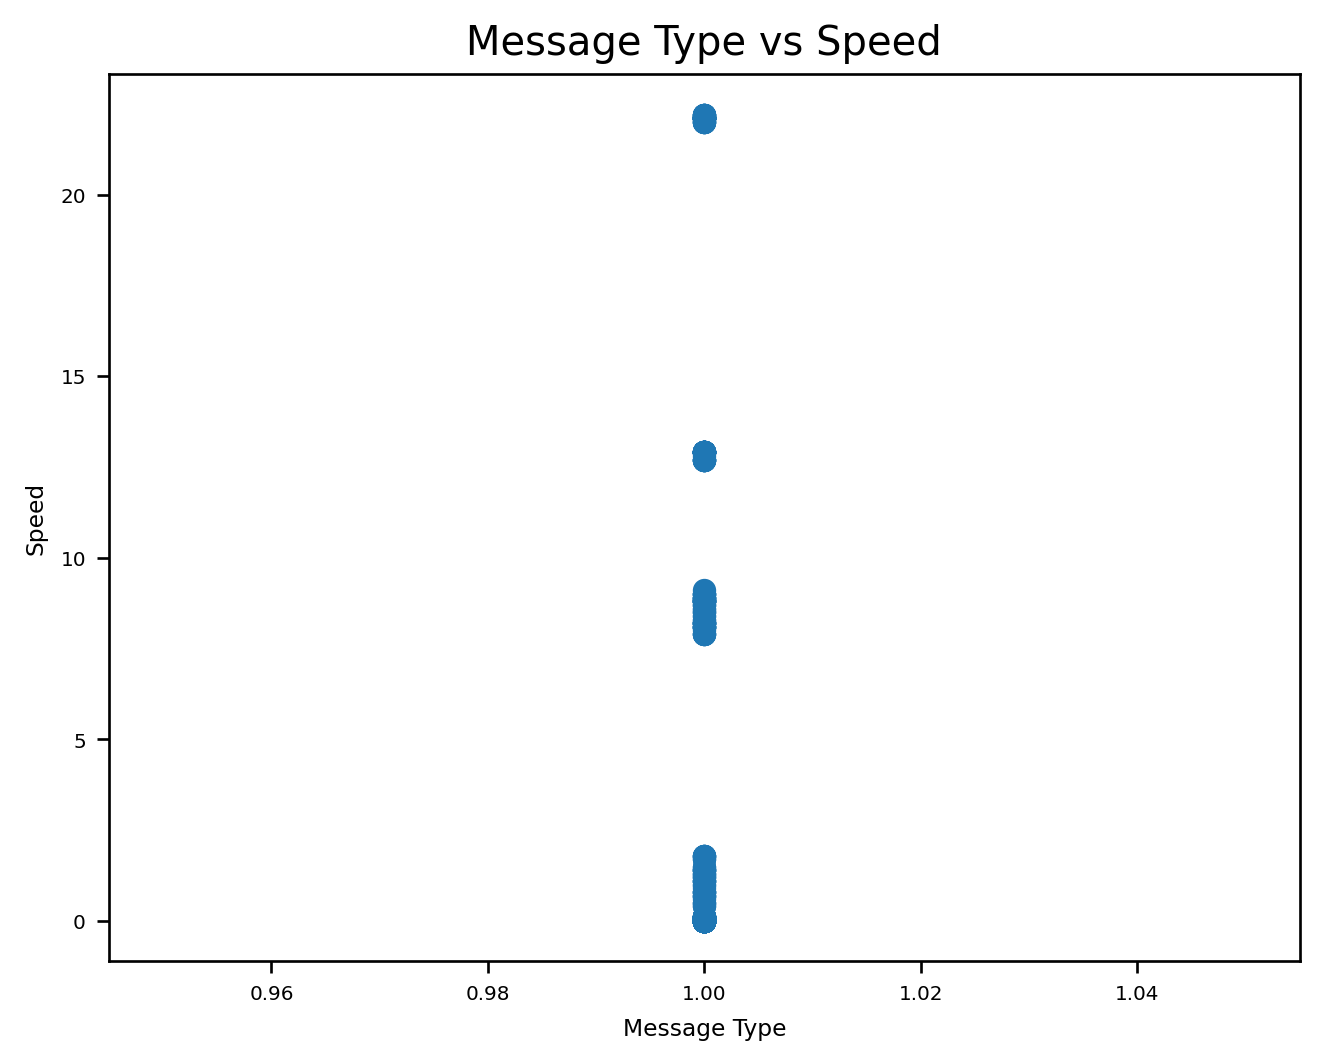

In [25]:
#Test graph to see if this is a good way of displaying data and detecting outliers
#scatter plot - only message type 1
plt.scatter(msg_type_1_speed['msg_type'], msg_type_1_speed['speed'])
plt.xlabel('Message Type')
plt.ylabel('Speed')
plt.title('Message Type vs Speed')
plt.show()

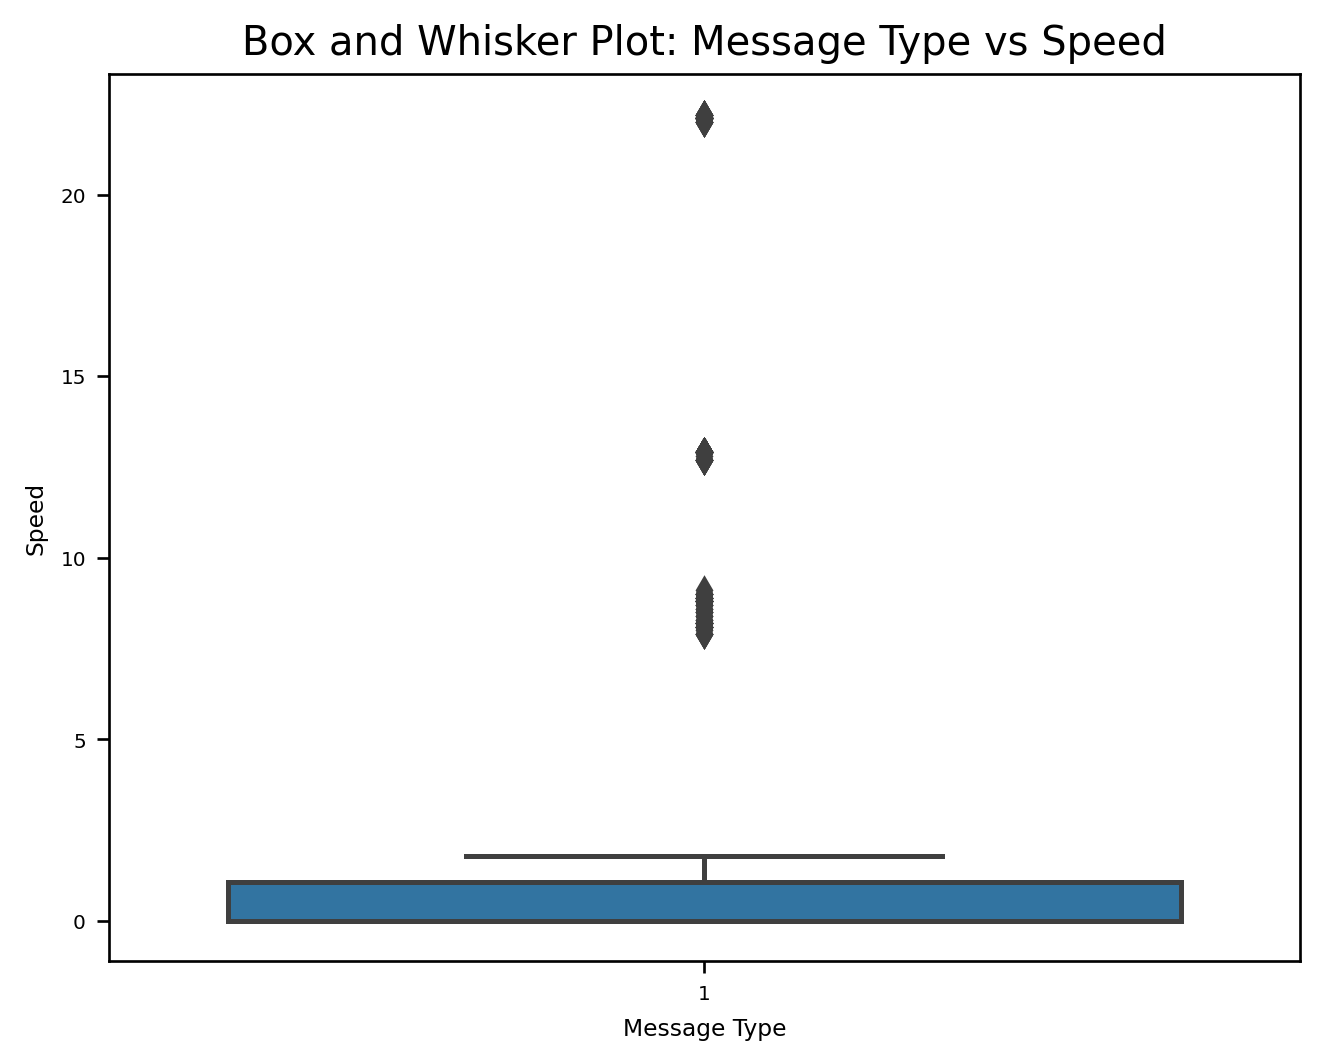

In [26]:
#box and whisker plot - only message type 1
sns.boxplot(x='msg_type', y='speed', data=msg_type_1_speed)
plt.xlabel('Message Type')
plt.ylabel('Speed')
plt.title('Box and Whisker Plot: Message Type vs Speed')
plt.show()

Box and Whisker Plot appears to be the best way to show the speed data and highlight potential outliers. The folowing code creates a plot with each message type. Potential anomalies are represented by black diamonds.

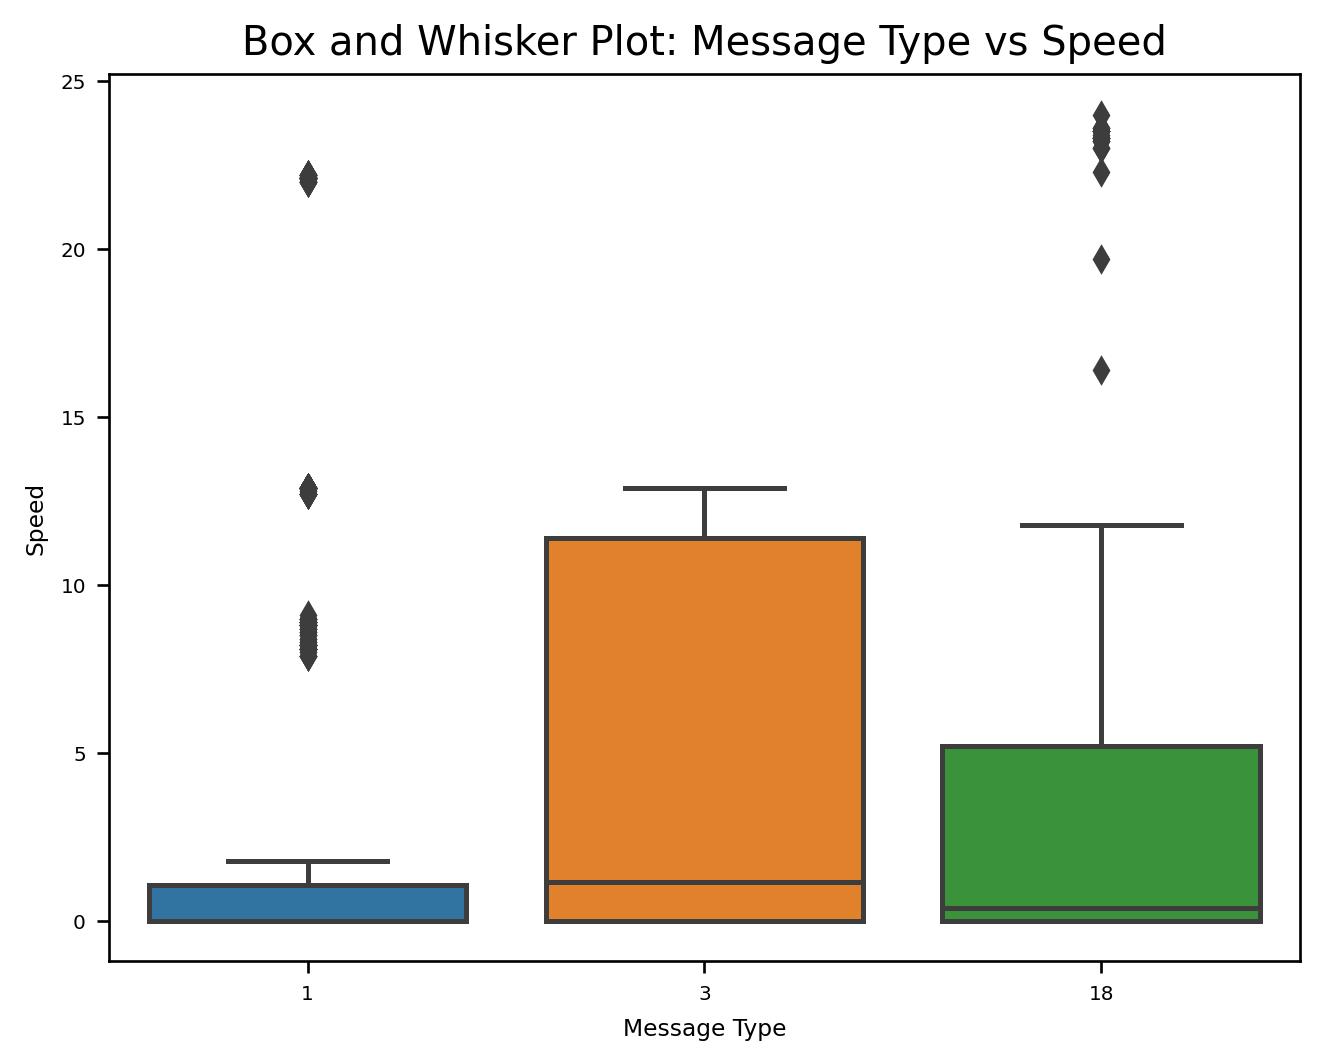

In [27]:
#box and whisker plot for all speed data
sns.boxplot(x='msg_type', y='speed', data=final_speed_data)
plt.xlabel('Message Type')
plt.ylabel('Speed')
plt.title('Box and Whisker Plot: Message Type vs Speed')
plt.show()

Now that some analysis has been performed, isolate the potential outliers and store them in a separate dataframe. Separation is based on both statistical and graphical analysis.

In [28]:
#Separating Potential Outliers
#Speed outliers
speed_outliers = final_speed_data.loc[((final_speed_data['speed'] > 5) & (final_speed_data['msg_type'] == 1)) | ((final_speed_data['speed'] > 15) & (final_speed_data['msg_type'] == 18))]

In [29]:
speed_outliers #print to check

,msg_type,mmsi,speed
3,18,276007420-A-18,23.6
17,1,276785000-A-1-UnderWayUsingEngine,8.1
19,1,276829000-A-1-UnderWayUsingEngine,22.1
28,1,538008636-A-1-UnderWayUsingEngine,12.9
40,18,276007420-A-18,23.0
...,...,...,...
1403,1,276829000-B-1-UnderWayUsingEngine,22.1
1411,1,309175000-B-1-UnderWayUsingEngine,9.0
1420,1,538008636-B-1-UnderWayUsingEngine,12.9
1422,1,405000238-A-1-UnderWayUsingEngine,12.8


In [30]:
speed_outliers.describe() #statistical overview of outliers, could also separate by message type

,msg_type,speed
count,154.000000,154.000000
mean,3.318182,14.955195
std,5.852997,6.267178
min,1.000000,7.900000
25%,1.000000,8.800000
50%,1.000000,12.900000
75%,1.000000,22.100000
max,18.000000,24.000000


In [31]:
#get unique mmsi values in outlier dataframe
np.unique(speed_outliers["mmsi"])

array(['276007420-A-18', '276007420-B-18',
       '276785000-A-1-UnderWayUsingEngine',
       '276785000-B-1-UnderWayUsingEngine',
       '276829000-A-1-UnderWayUsingEngine',
       '276829000-B-1-UnderWayUsingEngine',
       '309175000-A-1-UnderWayUsingEngine',
       '309175000-B-1-UnderWayUsingEngine',
       '405000238-A-1-UnderWayUsingEngine',
       '405000238-B-1-UnderWayUsingEngine',
       '538008636-A-1-UnderWayUsingEngine',
       '538008636-B-1-UnderWayUsingEngine',
       '613889000-A-1-UnderWayUsingEngine',
       '613889000-B-1-UnderWayUsingEngine'], dtype=object)

The MMSIs associated with potential outliers can then be used to find out more information about the ship and help in the classification of the outlier. It may be the case that the outlier is benign but this process can help to determine this.
One possible website that can be used is: https://www.vesselfinder.com/vessels

2. Latitude and Longitude Data Analysis

Statistical Analysis

In [32]:
final_lon_lat_data.describe() #get statistical overview of the AIS messages with lat & lon

,msg_type,lon,lat
count,1268.000000,1268.000000,1268.000000
mean,4.463722,24.669392,59.614807
std,6.153350,0.525159,0.440069
min,1.000000,20.813120,59.444655
25%,1.000000,24.669497,59.459609
50%,2.000000,24.713998,59.499358
75%,4.000000,24.793167,59.566473
max,21.000000,28.553630,63.085430


Graphical Analysis

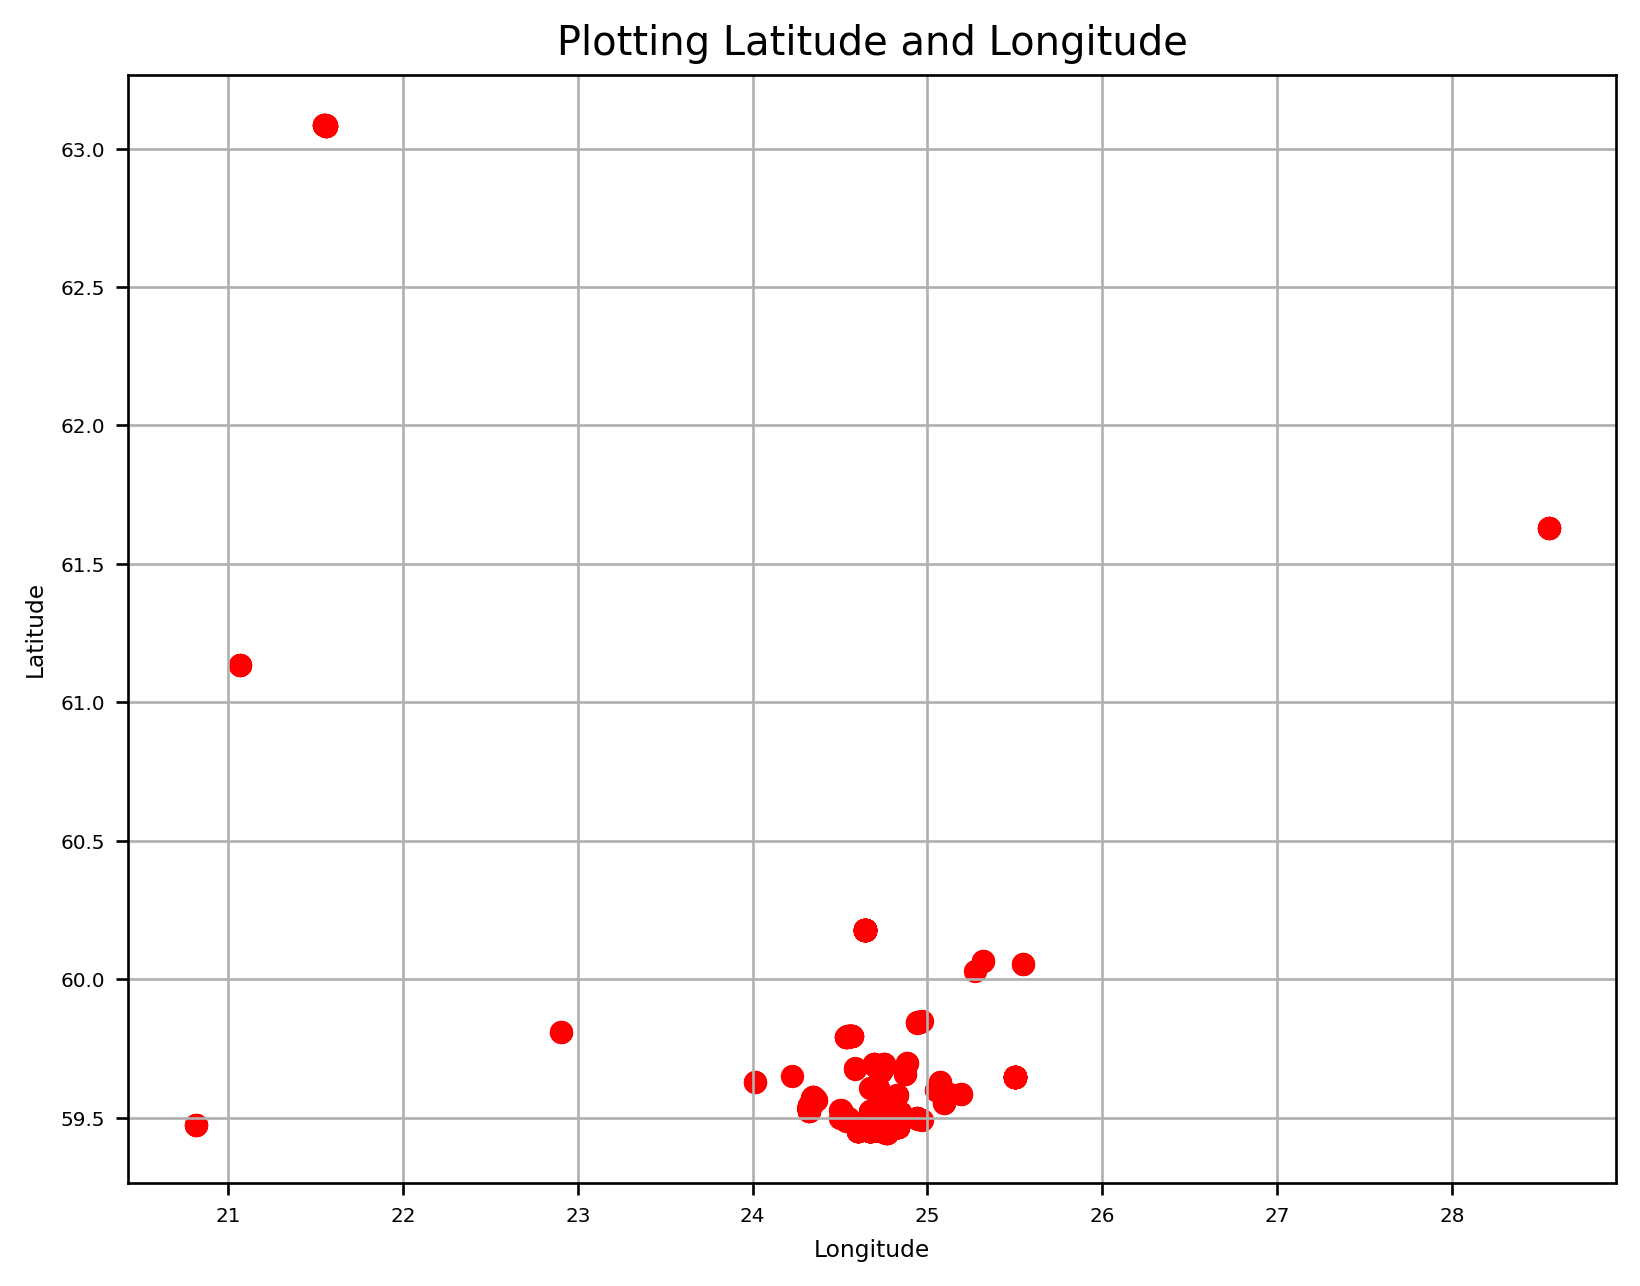

In [33]:
#latitude and longitude scatter plot
longitude = final_lon_lat_data.iloc[:,2]  # longitude values
latitude= final_lon_lat_data.iloc[:,3]   # latitude values

# Plotting the coordinates
plt.figure(figsize=(8, 6))
plt.scatter(longitude, latitude, color='red', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plotting Latitude and Longitude')
plt.grid(True)
plt.show()

In [34]:
#pip install folium #install folium if not already installed

In [35]:
#plot coordinates on a map - may be easier to identify outliers
import folium #library used to map coordinates

#estimated latitude and longitude of AIS receiver based on Estonia
latitude_centre = 58.5
longitude_centre = 24.5

# Create a map centered on a specific latitude and longitude
map = folium.Map(location=[latitude_centre, longitude_centre], zoom_start=5)

# Iterate through the latitude and longitude coordinates
for lat, lon in zip(latitude, longitude):
    # Add a marker for each coordinate
    folium.Marker(
        location=[lat, lon],
        popup='Latitude: {}, Longitude: {}'.format(lat, lon)
    ).add_to(map)

# Display the map
map

From the analysis performed, some outliers have been detected that appear to originate from land rather than the sea. An image of these outliers (with the coordinates) is stored in the repository. This value will be used to isolate these outliers in a separate dataframe for further analysis. 

In [36]:
#Separate outliers from lat & lon data
lat_lon_outliers = final_lon_lat_data.loc[((final_lon_lat_data['lat'] == 60.177318))]

In [37]:
lat_lon_outliers #print outliers, use the mmsi to find out additional details about the ship to be able to classify the outliers

,msg_type,mmsi,lon,lat
55,4,002300108-A-4,24.640202,60.177318
1129,4,002300108-A-4,24.640198,60.177318
1140,4,002300108-B-4,24.640198,60.177318
1181,4,002300108-A-4,24.640193,60.177318


A similar process to that performed and described above with the speed outliers can be used to classify the latitude and longitude outliers.

3. Time data Analysis

Statistical Analysis

In [38]:
final_time_data.describe() #statistical overview of time_data

,msg_type,time
count,1435.000000,1.435000e+03
mean,5.727526,1.662518e+09
std,7.361860,9.746904e+01
min,1.000000,1.662518e+09
25%,1.000000,1.662518e+09
50%,3.000000,1.662518e+09
75%,4.000000,1.662518e+09
max,24.000000,1.662518e+09


In the current format, the time feature in isolation does not appear to be that useful and easy to use as the other features. Due to a lack of time, the analysis for the time feature will be left here.

Some suggestions for future analysis include combining time with other features so that the data is more useful in terms of the analysis that can be performed. Also, it may be a good idea to source some data from other sources to repeat the analysis with new data and see any other insights that can be found. It may also be good to identify patterns of outliers and use these to set thresholds so that outliers can be automatically detected - with the ultimate goal being to perform real time anomaly detection when an AIS message is received.